In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Feature_Selection.csv')
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,3.04,6,560.000000,1
1,1,1.50,0,824.000000,1
2,1,3.75,5,3.000000,1
3,1,1.71,0,322.159652,1
4,1,2.50,0,322.159652,1


In [4]:
# df = df[df.Approved == 0]
# df.head()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df.drop('Approved',axis=1))

In [6]:

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income
0,0.955975,0.378904,0.739920,0.210731
1,0.955975,-0.205818,-0.493976,0.764994
2,0.955975,0.648484,0.534270,-0.958679
3,0.955975,-0.126083,-0.493976,-0.288610
4,0.955975,0.173872,-0.493976,-0.288610


In [7]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['Approved'],test_size=0.20,random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB().fit(X_train,y_train)
prediction=NB.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))

confusion matrix : [[65 10]
 [25 38]]
Accuracy Score : 0.7463768115942029
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        75
           1       0.79      0.60      0.68        63

    accuracy                           0.75       138
   macro avg       0.76      0.73      0.74       138
weighted avg       0.75      0.75      0.74       138



In [10]:
# Area Under Curve
auc = roc_auc_score(y_test, prediction)
auc

0.734920634920635

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

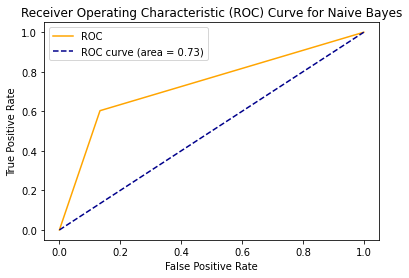

In [12]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [13]:
import pickle

 # save the model to disk
filename = 'finalized_model_nb.sav'
pickle.dump(NB, open(filename, 'wb'))